# 1. Import Libraries

In [43]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import   Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import(
    OneHotEncoder,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer,
    OrdinalEncoder,
    StandardScaler,

) 


from feature_engine.encoding import (
    RareLabelEncoder, 
    MeanEncoder, 
    CountFrequencyEncoder

)
from feature_engine.datetime import DatetimeFeatures
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SelectBySingleFeaturePerformance



import matplotlib.pyplot as plt

import warnings



# 2.Display Settings

#### ignore warnings.

In [2]:
warnings.filterwarnings("ignore")

#### display all columns

In [3]:
pd.set_option('display.max_columns', None)

#### transformed output as pandas dataframe and not numpy array.

In [4]:
sklearn.set_config(transform_output="pandas")

# 3. Read Training Dataset

In [5]:
path=r'C:\Users\user\Desktop\flight-predictor\data\train.csv'

train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-03-27,delhi,cochin,09:00:00,21:00:00,720,1.0,No info,12537
1,Indigo,2019-06-03,delhi,cochin,10:35:00,01:30:00,895,1.0,No info,5883
2,Spicejet,2019-04-03,kolkata,banglore,15:05:00,20:20:00,315,1.0,No info,4649
3,Air India,2019-03-06,mumbai,hyderabad,05:05:00,16:55:00,710,2.0,No info,16697
4,Jet Airways,2019-06-21,banglore,delhi,18:55:00,22:00:00,185,0.0,in-flight meal not included,7754
...,...,...,...,...,...,...,...,...,...,...
3195,Multiple Carriers,2019-03-21,delhi,cochin,09:00:00,15:30:00,390,1.0,No info,8307
3196,Air India,2019-04-09,delhi,cochin,14:05:00,17:55:00,230,0.0,No info,6724
3197,Jet Airways,2019-05-01,kolkata,banglore,09:35:00,23:35:00,840,1.0,No info,13067
3198,Jet Airways,2019-03-15,banglore,new delhi,21:25:00,05:05:00,460,1.0,No info,27210


Spilting X_train and y_train(target feature).

In [6]:
X_train = train.drop(columns='price')
y_train = train.price.copy()

In [7]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Multiple Carriers,2019-03-27,delhi,cochin,09:00:00,21:00:00,720,1.0,No info
1,Indigo,2019-06-03,delhi,cochin,10:35:00,01:30:00,895,1.0,No info
2,Spicejet,2019-04-03,kolkata,banglore,15:05:00,20:20:00,315,1.0,No info
3,Air India,2019-03-06,mumbai,hyderabad,05:05:00,16:55:00,710,2.0,No info
4,Jet Airways,2019-06-21,banglore,delhi,18:55:00,22:00:00,185,0.0,in-flight meal not included
...,...,...,...,...,...,...,...,...,...
3195,Multiple Carriers,2019-03-21,delhi,cochin,09:00:00,15:30:00,390,1.0,No info
3196,Air India,2019-04-09,delhi,cochin,14:05:00,17:55:00,230,0.0,No info
3197,Jet Airways,2019-05-01,kolkata,banglore,09:35:00,23:35:00,840,1.0,No info
3198,Jet Airways,2019-03-15,banglore,new delhi,21:25:00,05:05:00,460,1.0,No info


In [8]:
y_train

0       12537
1        5883
2        4649
3       16697
4        7754
        ...  
3195     8307
3196     6724
3197    13067
3198    27210
3199    10844
Name: price, Length: 3200, dtype: int64

# 4. Transformation Operations

## 4.1 Airline

#### on the airline column we will perform:

1) Imputation for missing values

2) Group Rare Labels

3) One-hot Encoding

In [9]:
X_train.airline 

0       Multiple Carriers
1                  Indigo
2                Spicejet
3               Air India
4             Jet Airways
              ...        
3195    Multiple Carriers
3196            Air India
3197          Jet Airways
3198          Jet Airways
3199          Jet Airways
Name: airline, Length: 3200, dtype: object

In [10]:
air_transformer = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('group_labels', RareLabelEncoder(n_categories=2, tol=0.1, replace_with='Others')),
    ('Ohe', OneHotEncoder(sparse_output=False , handle_unknown='ignore'))
])

air_transformer.fit_transform(X_train.loc[:, ["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Others
0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
3195,0.0,0.0,0.0,1.0,0.0
3196,1.0,0.0,0.0,0.0,0.0
3197,0.0,0.0,1.0,0.0,0.0
3198,0.0,0.0,1.0,0.0,0.0


## 4.2 date_of_journey     

#### on this column we will perform the following transformations: 
1) Date-time feature extraction
2) Min Max Scaling

In [11]:
features_to_extract = ['month', 'week','day_of_month','day_of_week']

In [12]:

doj_transformer = Pipeline(steps = [
    ('dt_feature', DatetimeFeatures(features_to_extract=features_to_extract, yearfirst=True, format="mixed")),
    ('min-max', MinMaxScaler())
    
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_month,date_of_journey_day_of_week
0,0.000000,0.235294,1.000000,0.333333
1,1.000000,0.823529,0.076923,0.000000
2,0.333333,0.294118,0.076923,0.333333
3,0.000000,0.058824,0.192308,0.333333
4,1.000000,0.941176,0.769231,0.666667
...,...,...,...,...
3195,0.000000,0.176471,0.769231,0.500000
3196,0.333333,0.352941,0.307692,0.166667
3197,0.666667,0.529412,0.000000,0.333333
3198,0.000000,0.117647,0.538462,0.666667


## 4.3 source and destination     

#### since these 2 columns are similar we will deal with them together: 
1)  Group Rare Labels
2) Mean Encoding
3) Power Transformer
4) Is North City (New column)

In [13]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,delhi,cochin
1,delhi,cochin
2,kolkata,banglore
3,mumbai,hyderabad
4,banglore,delhi
...,...,...
3195,delhi,cochin
3196,delhi,cochin
3197,kolkata,banglore
3198,banglore,new delhi


In [14]:

location_transfomer = Pipeline(steps=[
    ('group-label', RareLabelEncoder(tol=0.1, n_categories=2, replace_with='others')),
    ('mean_encoding', MeanEncoder()),
    ('power_transformer',PowerTransformer())
]) 

location_transfomer.fit_transform(location_subset,y_train)

,source,destination
0,1.058972,1.056852
1,1.058972,1.056852
2,-0.184239,-0.195717
3,-1.887646,-0.815121
4,-0.911914,-1.822694
...,...,...
3195,1.058972,1.056852
3196,1.058972,1.056852
3197,-0.184239,-0.195717
3198,-0.911914,-0.815121


#### Creating a new column "is_north"

#### finding unique categories in source and destination 

In [15]:
np.union1d(
    X_train.source.unique(),
    X_train.destination.unique()
 
    )


array(['banglore', 'chennai', 'cochin', 'delhi', 'hyderabad', 'kolkata',
       'mumbai', 'new delhi'], dtype=object)

In [16]:
def is_north(X):
    columns = X.columns.to_list()
    north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
    return (
        X
        .assign(**{
            f"{col}_is_north": X.loc[:, col].isin(north_cities).astype(int)
            for col in columns
        })
    .drop(columns=columns)
    )


FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3195,0,0
3196,0,0
3197,0,0
3198,0,0


In [17]:
location_final_transformer = FeatureUnion(transformer_list = [
    ('intial', location_transfomer),
    ('final', FunctionTransformer(func=is_north))
])

location_final_transformer.fit_transform(location_subset,y_train)

,source,destination,source_is_north,destination_is_north
0,1.058972,1.056852,0,0
1,1.058972,1.056852,0,0
2,-0.184239,-0.195717,0,0
3,-1.887646,-0.815121,0,0
4,-0.911914,-1.822694,0,0
...,...,...,...,...
3195,1.058972,1.056852,0,0
3196,1.058972,1.056852,0,0
3197,-0.184239,-0.195717,0,0
3198,-0.911914,-0.815121,0,0


## 4.4 dep_time & arrival_time

#### on these 2 columns we will perform: 

1) Date-time features
2) Min Max Scaling
3) Part of Day
4) Count Encoding
5) Min Max Scaling

In [18]:
X_train.dep_time

0       09:00:00
1       10:35:00
2       15:05:00
3       05:05:00
4       18:55:00
          ...   
3195    09:00:00
3196    14:05:00
3197    09:35:00
3198    21:25:00
3199    08:25:00
Name: dep_time, Length: 3200, dtype: object

In [19]:
X_train.arrival_time

0       21:00:00
1       01:30:00
2       20:20:00
3       16:55:00
4       22:00:00
          ...   
3195    15:30:00
3196    17:55:00
3197    23:35:00
3198    05:05:00
3199    20:45:00
Name: arrival_time, Length: 3200, dtype: object

#### after a quick look at these both columns we can see that seconds is always zero so no need to extract that.


In [20]:
time_subset = train.loc[:,['dep_time','arrival_time']]
time_subset

,dep_time,arrival_time
0,09:00:00,21:00:00
1,10:35:00,01:30:00
2,15:05:00,20:20:00
3,05:05:00,16:55:00
4,18:55:00,22:00:00
...,...,...
3195,09:00:00,15:30:00
3196,14:05:00,17:55:00
3197,09:35:00,23:35:00
3198,21:25:00,05:05:00


In [21]:
time_to_extract = ['hour','minute']

time_pipe_1 = Pipeline (steps = [
    ('dt_extraction', DatetimeFeatures(features_to_extract=time_to_extract)),
    ('scaler', MinMaxScaler())
    
])

time_pipe_1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.391304,0.000000,0.913043,0.000000
1,0.434783,0.636364,0.043478,0.545455
2,0.652174,0.090909,0.869565,0.363636
3,0.217391,0.090909,0.695652,1.000000
4,0.782609,1.000000,0.956522,0.000000
...,...,...,...,...
3195,0.391304,0.000000,0.652174,0.545455
3196,0.608696,0.090909,0.739130,1.000000
3197,0.391304,0.636364,1.000000,0.636364
3198,0.913043,0.454545,0.217391,0.090909


#### creating a new feature to define the part of day.

In [22]:
def part_of_day(data, morning=4 , noon=12 , eve=16 , night=20):
    columns = data.columns.to_list()
    X_temp = data.assign(**{
                    col: pd.to_datetime(data.loc[:, col]).dt.hour
                    for col in columns
    })
    
    return (
        X_temp
        .assign(**{
            f"{col}_part_of_day": np.select(
                [X_temp.loc[:, col].between(morning, noon, inclusive="left"),
                X_temp.loc[:, col].between(noon, eve, inclusive="left"),
                X_temp.loc[:, col].between(eve, night, inclusive="left")],
                ["morning", "afternoon", "eve"],
                default = "night"
            )
            for col in columns
        })
       .drop(columns=columns)
        
    )
    
FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,morning,night
1,morning,night
2,afternoon,night
3,morning,eve
4,eve,night
...,...,...
3195,morning,afternoon
3196,afternoon,eve
3197,morning,night
3198,night,morning


In [23]:
time_pipe_2  = Pipeline(steps = [
    ('function',FunctionTransformer(func=part_of_day)),
    ('encoding', CountFrequencyEncoder()),
    ('scaler', MinMaxScaler())
    
])

time_pipe_2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,1.000000,1.000000
1,1.000000,1.000000
2,0.000000,1.000000
3,1.000000,0.584158
4,0.258834,1.000000
...,...,...
3195,1.000000,0.000000
3196,0.000000,0.584158
3197,1.000000,1.000000
3198,0.189929,0.863366


In [24]:
time_transformer = FeatureUnion(transformer_list = [
    ('pipe_1',time_pipe_1),
    ('pipe_2',time_pipe_2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.391304,0.000000,0.913043,0.000000,1.000000,1.000000
1,0.434783,0.636364,0.043478,0.545455,1.000000,1.000000
2,0.652174,0.090909,0.869565,0.363636,0.000000,1.000000
3,0.217391,0.090909,0.695652,1.000000,1.000000,0.584158
4,0.782609,1.000000,0.956522,0.000000,0.258834,1.000000
...,...,...,...,...,...,...
3195,0.391304,0.000000,0.652174,0.545455,1.000000,0.000000
3196,0.608696,0.090909,0.739130,1.000000,0.000000,0.584158
3197,0.391304,0.636364,1.000000,0.636364,1.000000,1.000000
3198,0.913043,0.454545,0.217391,0.090909,0.189929,0.863366


## 4.5 Duration

In [25]:
train.duration

0       720
1       895
2       315
3       710
4       185
       ... 
3195    390
3196    230
3197    840
3198    460
3199    740
Name: duration, Length: 3200, dtype: int64

In [26]:
(
    X_train
    .duration
    .quantile([0.25,0.50,0.75])
    .values
    .reshape(-1, 1)
)

array([[170.],
       [510.],
       [920.]])

In [27]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
        self.variables = variables
        self.percentiles = percentiles
        self.gamma = gamma


    def fit(self, X, y=None):
        if not self.variables:
            self.variables = X.select_dtypes(include="number").columns.to_list()

        self.reference_values_ = {
            col: (
                X
                .loc[:, col]
                .quantile(self.percentiles)
                .values
                .reshape(-1, 1)
            )
            for col in self.variables
        }

        return self


    def transform(self, X):
        objects = []
        for col in self.variables:
            columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
            obj = pd.DataFrame(
                data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
                columns=columns
            )
            objects.append(obj)
        return pd.concat(objects, axis=1)

In [28]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.000000e+00,0.0,1.000000,1.000000
1,0.000000e+00,0.0,1.000000,1.000000
2,1.135971e-88,0.0,1.000000,1.000000
3,0.000000e+00,0.0,0.904837,0.904837
4,0.000000e+00,0.0,0.904837,0.904837
...,...,...,...,...
3195,8.194013e-40,0.0,1.000000,1.000000
3196,0.000000e+00,0.0,0.904837,0.904837
3197,0.000000e+00,0.0,1.000000,1.000000
3198,0.000000e+00,0.0,1.000000,1.000000


In [29]:
def duration_category(X, short=180, medium=400):
    return(
        X
        .assign(
            duration_cat = np.select([
                X.duration.lt(short),
                X.duration.between(short,medium, inclusive="left")],
                ['short','medium'],
                default = 'long'
            )
        )
        .drop(columns="duration")
    )

In [30]:
def is_over(X, value=1000):
    return (
        X
        .assign(**{
            f"is_over_{value}":X.duration.ge(value).astype(int)
        })
        .drop(columns= 'duration')
    )

In [31]:
# Pipelines
duration_pipeline_1 = Pipeline(steps = [
    ('rbf', RBFPercentileSimilarity()),
    ("scaler", PowerTransformer())
])

duration_pipe_2 = Pipeline(steps = [
    ('category', FunctionTransformer(func=duration_category)),
    ('encoder', OrdinalEncoder(categories=[["short", "medium", "long"]])),
])

duration_union = FeatureUnion(transformer_list= [
    ('duration_1', duration_pipeline_1),
    ('duration_2', duration_pipe_2),
    ('duration_3', FunctionTransformer(func=is_over)),
    ("part4", StandardScaler())
    
])

duration_transformer = Pipeline(steps=[
    ("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
    ("imputer", SimpleImputer(strategy="median")),
    ("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ['duration']])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,is_over_1000,duration
0,-0.352914,-0.098498,-0.081302,2.0,0,0.170006
1,-0.352914,-0.098498,-0.081302,2.0,0,0.521544
2,-0.352914,-0.098498,-0.081302,1.0,0,-0.643553
3,-0.352914,-0.098498,-0.081302,2.0,0,0.149918
4,-0.352914,-0.098498,-0.081302,1.0,0,-0.904696
...,...,...,...,...,...,...
3195,-0.352914,-0.098498,-0.081302,1.0,0,-0.492894
3196,-0.352914,-0.098498,-0.081302,1.0,0,-0.814300
3197,-0.352914,-0.098498,-0.081302,2.0,0,0.411061
3198,-0.352914,-0.098498,-0.081302,2.0,0,-0.352279


## 4.6 Total Stops

In [32]:
def is_direct(X):
    return X.assign(
        is_direct_flight = X.total_stops.eq(0).astype(int)
    )
    

In [33]:
total_stops_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('is_direct', FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,1.0,0
1,1.0,0
2,1.0,0
3,2.0,0
4,0.0,1
...,...,...
3195,1.0,0
3196,0.0,1
3197,1.0,0
3198,1.0,0


## 4.7 Additional_info

In [34]:
train.additional_info

0                           No info
1                           No info
2                           No info
3                           No info
4       in-flight meal not included
                   ...             
3195                        No info
3196                        No info
3197                        No info
3198                        No info
3199    in-flight meal not included
Name: additional_info, Length: 3200, dtype: object

In [49]:
info_pipe1 = Pipeline(steps=[
    ("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_No info,additional_info_Other,additional_info_in-flight meal not included
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
3195,1.0,0.0,0.0
3196,1.0,0.0,0.0
3197,1.0,0.0,0.0
3198,1.0,0.0,0.0


In [50]:
def have_info(X):
    return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [51]:
info_union = FeatureUnion(transformer_list=[
    ("part1", info_pipe1),
    ("part2", FunctionTransformer(func=have_info))
])

In [52]:
info_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_No info,additional_info_Other,additional_info_in-flight meal not included,additional_info
0,1.0,0.0,0.0,1
1,1.0,0.0,0.0,1
2,1.0,0.0,0.0,1
3,1.0,0.0,0.0,1
4,0.0,0.0,1.0,1
...,...,...,...,...
3195,1.0,0.0,0.0,1
3196,1.0,0.0,0.0,1
3197,1.0,0.0,0.0,1
3198,1.0,0.0,0.0,1


# 5. Column Transformer

In [53]:
column_transformer = ColumnTransformer(transformers=[
    ('airline', air_transformer, ['airline']),
    ('doj', doj_transformer,['date_of_journey']),
    ('location', location_final_transformer, ['source','destination']),
    ('time',time_transformer,['dep_time','arrival_time']),
    ('duration', duration_transformer, ['duration']),
    ('total_stops',total_stops_transformer,['total_stops']),
    ('add_info', info_transformer, ['additional_info'])
    
],  remainder="passthrough")

column_transformer.fit_transform(X_train, y_train, )

,airline__airline_Air India,airline__airline_Indigo,airline__airline_Jet Airways,airline__airline_Multiple Carriers,airline__airline_Others,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_month,doj__date_of_journey_day_of_week,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,duration__duration_rbf_25,duration__duration_rbf_50,duration__duration_rbf_75,duration__duration_cat,duration__is_over_1000,duration__duration,total_stops__total_stops,total_stops__is_direct_flight,add_info__additional_info_No info,add_info__additional_info_Other,add_info__additional_info_in-flight meal not included,add_info__additional_info
0,0.0,0.0,0.0,1.0,0.0,0.000000,0.235294,1.000000,0.333333,1.058972,1.056852,0,0,0.391304,0.000000,0.913043,0.000000,1.000000,1.000000,-0.352914,-0.098498,-0.081302,2.0,0,0.170006,1.0,0,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0.0,0.0,1.000000,0.823529,0.076923,0.000000,1.058972,1.056852,0,0,0.434783,0.636364,0.043478,0.545455,1.000000,1.000000,-0.352914,-0.098498,-0.081302,2.0,0,0.521544,1.0,0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,0.333333,0.294118,0.076923,0.333333,-0.184239,-0.195717,0,0,0.652174,0.090909,0.869565,0.363636,0.000000,1.000000,-0.352914,-0.098498,-0.081302,1.0,0,-0.643553,1.0,0,1.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.192308,0.333333,-1.887646,-0.815121,0,0,0.217391,0.090909,0.695652,1.000000,1.000000,0.584158,-0.352914,-0.098498,-0.081302,2.0,0,0.149918,2.0,0,1.0,0.0,0.0,1
4,0.0,0.0,1.0,0.0,0.0,1.000000,0.941176,0.769231,0.666667,-0.911914,-1.822694,0,0,0.782609,1.000000,0.956522,0.000000,0.258834,1.000000,-0.352914,-0.098498,-0.081302,1.0,0,-0.904696,0.0,1,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.0,0.0,0.0,1.0,0.0,0.000000,0.176471,0.769231,0.500000,1.058972,1.056852,0,0,0.391304,0.000000,0.652174,0.545455,1.000000,0.000000,-0.352914,-0.098498,-0.081302,1.0,0,-0.492894,1.0,0,1.0,0.0,0.0,1
3196,1.0,0.0,0.0,0.0,0.0,0.333333,0.352941,0.307692,0.166667,1.058972,1.056852,0,0,0.608696,0.090909,0.739130,1.000000,0.000000,0.584158,-0.352914,-0.098498,-0.081302,1.0,0,-0.814300,0.0,1,1.0,0.0,0.0,1
3197,0.0,0.0,1.0,0.0,0.0,0.666667,0.529412,0.000000,0.333333,-0.184239,-0.195717,0,0,0.391304,0.636364,1.000000,0.636364,1.000000,1.000000,-0.352914,-0.098498,-0.081302,2.0,0,0.411061,1.0,0,1.0,0.0,0.0,1
3198,0.0,0.0,1.0,0.0,0.0,0.000000,0.117647,0.538462,0.666667,-0.911914,-0.815121,0,0,0.913043,0.454545,0.217391,0.090909,0.189929,0.863366,-0.352914,-0.098498,-0.081302,2.0,0,-0.352279,1.0,0,1.0,0.0,0.0,1


## 6. Feature Selection

In [54]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
    estimator =estimator,
    scoring="r2",
    threshold=0.1
) 

#### COMBINING PREPROCESSING AND FEATURE SELECTION IN PIPELINE

In [55]:
preprocessor  = Pipeline(steps=[
    ('ct', column_transformer),
    ('selector', selector)
])

preprocessor.fit_transform(X_train, y_train)


,airline__airline_Indigo,airline__airline_Jet Airways,airline__airline_Others,doj__date_of_journey_week,location__source,location__destination,duration__duration_rbf_25,duration__duration_cat,duration__is_over_1000,duration__duration,total_stops__total_stops,total_stops__is_direct_flight
0,0.0,0.0,0.0,0.235294,1.058972,1.056852,-0.352914,2.0,0,0.170006,1.0,0
1,1.0,0.0,0.0,0.823529,1.058972,1.056852,-0.352914,2.0,0,0.521544,1.0,0
2,0.0,0.0,1.0,0.294118,-0.184239,-0.195717,-0.352914,1.0,0,-0.643553,1.0,0
3,0.0,0.0,0.0,0.058824,-1.887646,-0.815121,-0.352914,2.0,0,0.149918,2.0,0
4,0.0,1.0,0.0,0.941176,-0.911914,-1.822694,-0.352914,1.0,0,-0.904696,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.0,0.0,0.0,0.176471,1.058972,1.056852,-0.352914,1.0,0,-0.492894,1.0,0
3196,0.0,0.0,0.0,0.352941,1.058972,1.056852,-0.352914,1.0,0,-0.814300,0.0,1
3197,0.0,1.0,0.0,0.529412,-0.184239,-0.195717,-0.352914,2.0,0,0.411061,1.0,0
3198,0.0,1.0,0.0,0.117647,-0.911914,-0.815121,-0.352914,2.0,0,-0.352279,1.0,0


## 6. Feature Performance

In [56]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'airline__airline_Air India': -0.0020092518771492505,
 'airline__airline_Indigo': 0.132218950587901,
 'airline__airline_Jet Airways': 0.1921042481558566,
 'airline__airline_Multiple Carriers': 0.020473674594821818,
 'airline__airline_Others': 0.11682938971848907,
 'doj__date_of_journey_month': 0.08158372321377583,
 'doj__date_of_journey_week': 0.158178701497891,
 'doj__date_of_journey_day_of_month': 0.024716512757934295,
 'doj__date_of_journey_day_of_week': 0.0037725922547524235,
 'location__source': 0.13050813887863208,
 'location__destination': 0.1333733690359978,
 'location__source_is_north': -0.0004043783915674837,
 'location__destination_is_north': -0.0004043783915674837,
 'time__dep_time_hour': 0.014604066988607797,
 'time__dep_time_minute': 0.03429165801309497,
 'time__arrival_time_hour': 0.09017575984335909,
 'time__arrival_time_minute': 0.02479249260777146,
 'time__dep_time_part_of_day': -0.007715438444295009,
 'time__arrival_time_part_of_day': 0.031962816711467244,
 'duratio

In [57]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_part_of_day': -0.007715438444295009,
 'airline__airline_Air India': -0.0020092518771492505,
 'duration__duration_rbf_75': -0.0012587032208220734,
 'location__source_is_north': -0.0004043783915674837,
 'location__destination_is_north': -0.0004043783915674837,
 'add_info__additional_info': -0.0004043783915674837,
 'duration__duration_rbf_50': -1.930435741089494e-05,
 'add_info__additional_info_No info': 0.00022315854839149996,
 'add_info__additional_info_in-flight meal not included': 0.0011062559479059948,
 'doj__date_of_journey_day_of_week': 0.0037725922547524235,
 'time__dep_time_hour': 0.014604066988607797,
 'add_info__additional_info_Other': 0.01962740779412427,
 'airline__airline_Multiple Carriers': 0.020473674594821818,
 'doj__date_of_journey_day_of_month': 0.024716512757934295,
 'time__arrival_time_minute': 0.02479249260777146,
 'time__arrival_time_part_of_day': 0.031962816711467244,
 'time__dep_time_minute': 0.03429165801309497,
 'doj__date_of_journey_month': 0.0

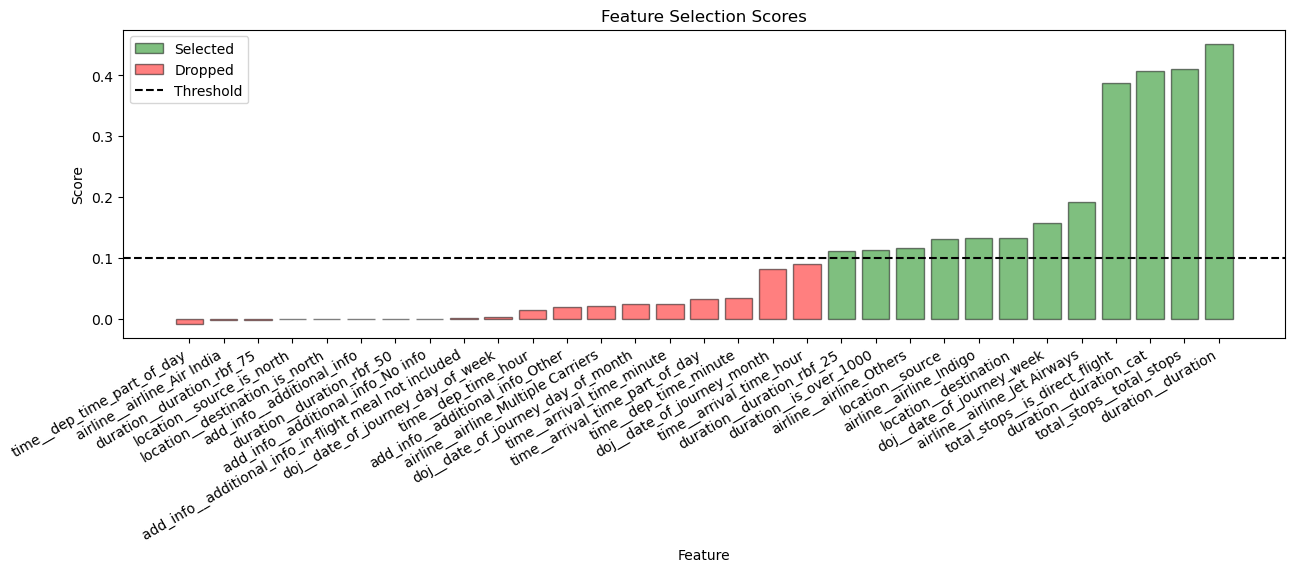

In [58]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
    params = dict(
        x=i,
        height=score,
        edgecolor="black",
        alpha=0.5
    )
    
    if score < THRESHOLD:
        bar = ax.bar(
            color="red",
            **params
        )
        if not dropped_bar:
            dropped_bar = bar[0]
    else:
        bar = ax.bar(
            color="green",
            **params
        )
        if not selected_bar:
            selected_bar = bar[0]

thresh_line = ax.axhline(
    y=0.1,
    color="black",
    linestyle="--"
)

ax.set_xticks(
    ticks=range(len(sorted_feat_imp)),
    labels=list(sorted_feat_imp.keys()),
    rotation=30,
    ha="right"
)

ax.set(
    xlabel="Feature",
    ylabel="Score",
    title="Feature Selection Scores"
)

ax.legend(
    handles=[selected_bar, dropped_bar, thresh_line],
    labels=["Selected", "Dropped", "Threshold"],
    oc="upper left"
)

plt.show()